In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from cycler import cycler
import re
import nltk
from collections import Counter

In [2]:
df = pd.read_csv('petfinderNY_database.csv')
df.head()

,additional_info,age,animal,breeds,description,id,lastUpdate,mixed,name,pet_size,...,sex,shelterID,zipcode,altered,vaccinated,housetrained,cynophobic,hates_children,felinephobic,specialNeeds
0,"['altered', 'hasShots', 'housetrained', 'noDog...",Adult,Cat,Tabby,Lincoln (#A1017544) was saved from the ACC's A...,30806905,2014-11-14T17:51:56Z,no,Lincoln,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Cynophobic,Definitely hates children,Not felinephobic,No special needs
1,"['altered', 'hasShots', 'housetrained']",Adult,Cat,Domestic Short Hair,ROOSIE (short for ROOSEVELT) is a nice easy-go...,32389630,2015-06-09T11:42:04Z,no,Roosie,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs
2,"['altered', 'hasShots', 'housetrained']",Young,Cat,Domestic Short Hair,Princess was a bottle baby rescued through ACC...,33623840,2015-10-26T21:06:00Z,no,Princess,Medium,...,Female,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs
3,"['altered', 'hasShots', 'housetrained']",Young,Cat,Domestic Short Hair,"MURRY!! Oh, we love this adolescent. Murry ...",34111054,2015-12-27T21:56:31Z,no,Murry,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs
4,"['altered', 'hasShots', 'housetrained']",Young,Cat,Domestic Short Hair,ADRIAN and ARABELLA (now called ARIE) are brot...,39463373,2017-09-23T05:21:02Z,no,ADRIAN & Arabella,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs


In [425]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#333333', '#006699']),
    'ps.fonttype': 42,
    'axes.facecolor': 'whitesmoke',
    'figure.facecolor': 'whitesmoke',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'font.family': 'sans',
    'font.sans-serif': 'Din Alternate',
    'axes.titlesize': 'x-large',
    'axes.grid': True,
    'grid.color': 'silver',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 4.0,
    'legend.frameon' : False
    
})

# Nice and loving pets

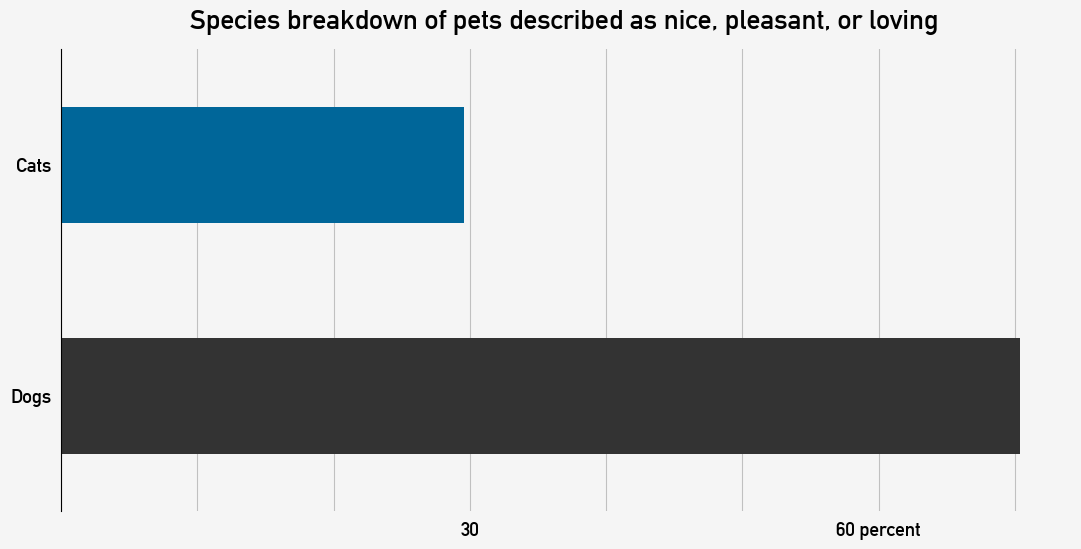

In [426]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = df[df.description.str.contains('nice|pleasant|loving')].animal.value_counts(normalize=True).plot(kind='barh', figsize=(13,6))
ax.set_xticklabels(labels=['', '', '', '30', '', '', '60 percent'], fontdict={'fontsize': 14})
ax.set_yticklabels(['Dogs', 'Cats'], fontdict={'fontsize': 14})
ax.set_ylabel('')
ax.grid(axis='y')


ax.set_title('Species breakdown of pets described as nice, pleasant, or loving', fontdict={'fontsize': 20,
        'fontweight' : 1,
        'verticalalignment': 'baseline', }, pad=15)

plt.savefig("nice-pets.svg")

# Pit Bulls Galore

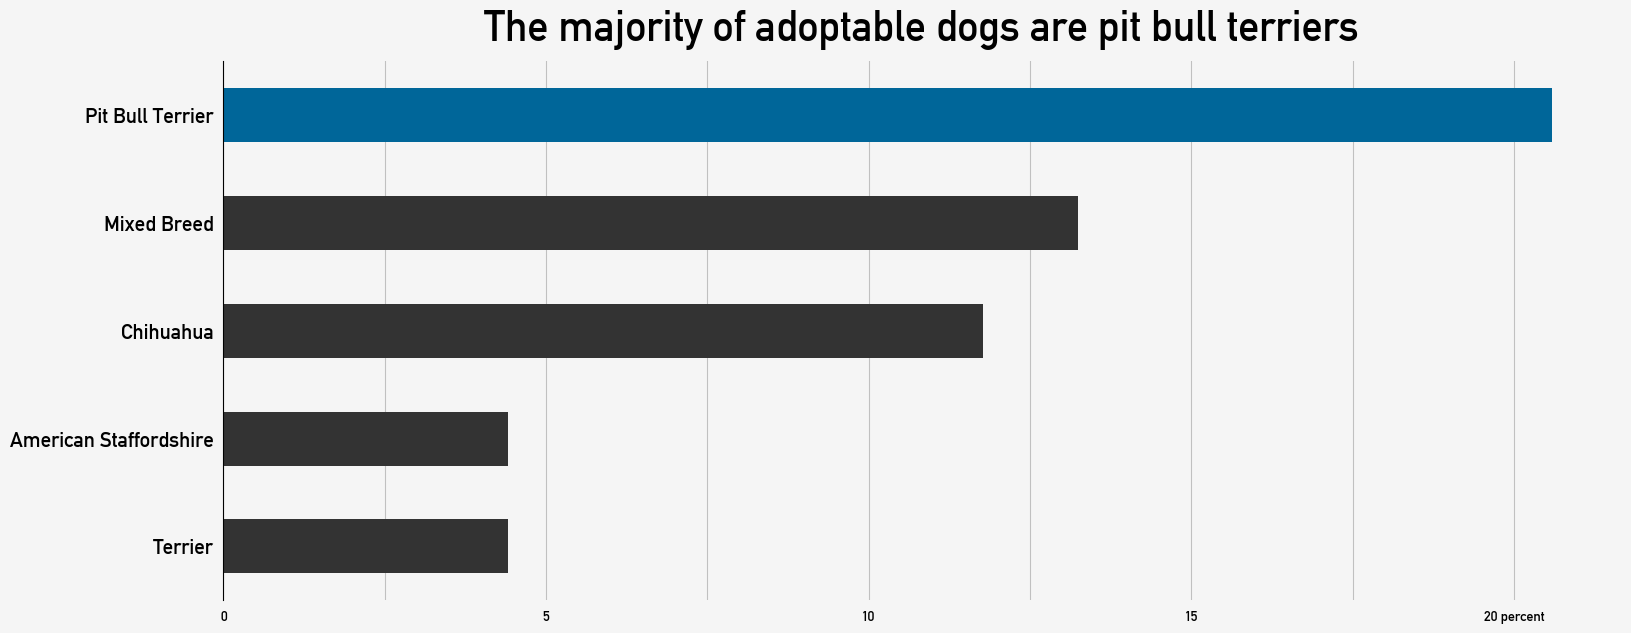

In [440]:
fig, ax = plt.subplots(facecolor='whitesmoke')


ax = df[(df.animal == 'Dog') & (df.mixed == 'no') ].breeds.value_counts(normalize=True).head(5).sort_values(ascending=True).plot(kind='barh', color= ['#333333', '#333333', '#333333', '#333333', '#006699'], figsize=(18,7))

ax.grid(axis='y')

ax.set_xticklabels(['0', '', '5', '', '10', '', '15', '', '20 percent'])

ax.set_title('The majority of adoptable dogs are pit bull terriers', fontdict={'fontsize': 30,
        'fontweight' : 1,
        'verticalalignment': 'baseline'}, pad=15)

ax.set_yticklabels(labels=['Terrier', 'American Staffordshire', 'Chihuahua', 'Mixed Breed', 'Pit Bull Terrier'], fontdict={'fontsize': 15})

plt.savefig("pit-bulls-galore.svg", facecolor=fig.get_facecolor(), transparent=True)

# Most used personality descriptors -- didn't use

In [296]:
descriptions_as_string_list = df.description.get_values().tolist()
descriptions_as_string = ''.join(descriptions_as_string_list)

tokenized_descriptions = nltk.word_tokenize(descriptions_as_string)
tagged_words = nltk.pos_tag(tokenized_descriptions)

all_adjectives = []

for tagged_word in tagged_words:
    if tagged_word[1] == 'JJ':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJS':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJR':
        all_adjectives.append(tagged_word[0])

adjective_df = pd.DataFrame(all_adjectives)

adjective_df = adjective_df[adjective_df[0] != 'other']
adjective_df = adjective_df[adjective_df[0] != 'foster']
adjective_df = adjective_df[adjective_df[0] != 'more']
adjective_df = adjective_df[adjective_df[0] != 'new']
adjective_df = adjective_df[adjective_df[0] != 'interested']
adjective_df = adjective_df[adjective_df[0] != 'negative']
adjective_df = adjective_df[adjective_df[0] != 'old']
adjective_df = adjective_df[adjective_df[0] != 'little']
adjective_df = adjective_df[adjective_df[0] != 'small']
adjective_df = adjective_df[adjective_df[0] != 'first']
adjective_df[0].value_counts().head(10)

sweet       178
great       147
good        139
friendly     86
happy        85
playful      76
best         76
perfect      70
gentle       69
active       63
Name: 0, dtype: int64

In [277]:
ax.barh?

In [278]:
wide_df = df.groupby('animal').hates_children.value_counts(normalize=True).unstack()

cyno_df = df.groupby('animal').cynophobic.value_counts(normalize=True).unstack()
feline_df = df.groupby('animal').felinephobic.value_counts(normalize=True).unstack()

In [279]:
wider_df = pd.merge(wide_df, cyno_df, on='animal')
widest_df = pd.merge(wider_df, feline_df, on='animal')

In [280]:
widest_df

,Definitely hates children,Does not hate children,Cynophobic,Not cynophobic,Felinephobic,Not felinephobic
animal,,,,,,
Cat,0.087379,0.912621,0.063107,0.936893,0.092233,0.907767
Dog,0.085185,0.914815,0.044444,0.955556,0.096296,0.903704


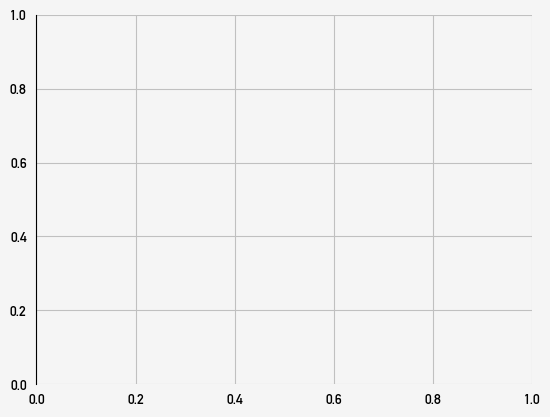

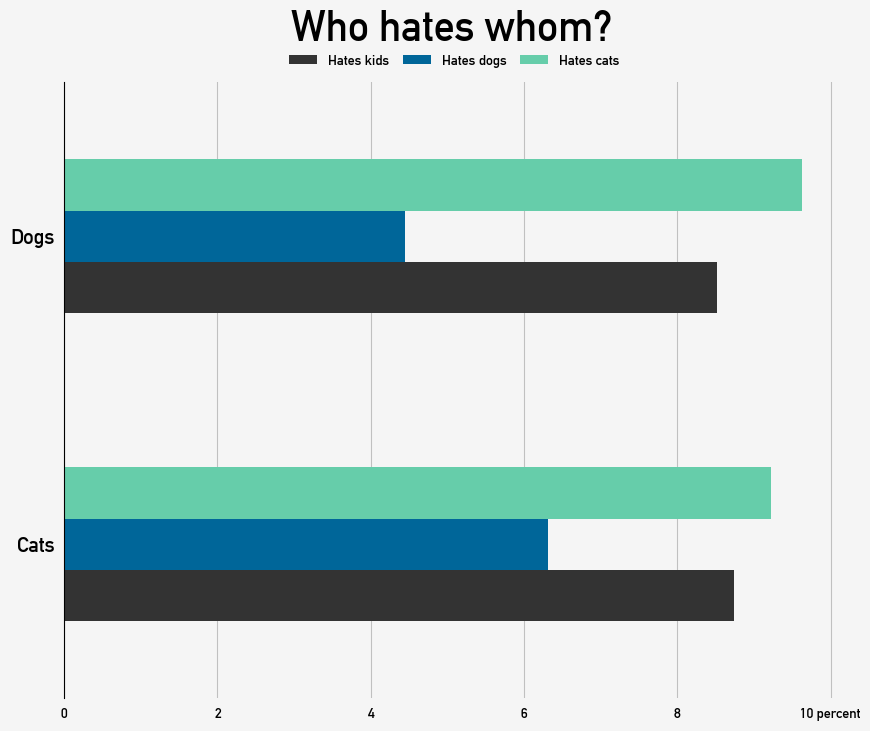

In [442]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = widest_df.plot(kind='barh', y=['Definitely hates children', 'Cynophobic', 'Felinephobic'], color = ['#333333', '#006699', 'mediumaquamarine'], figsize=(10,8))

ax.set_title('Who hates whom?', fontdict={'fontsize': 30,
        'fontweight' : 1,
        'verticalalignment': 'baseline'}, pad=30)

ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels([0,2,4,6,8,'10 percent'])
ax.set_yticklabels(labels=['Cats', 'Dogs'], fontdict={'fontsize': 15})
ax.legend(labels=['Hates kids', 'Hates dogs', 'Hates cats'], ncol=3, loc=(.283,1.015), columnspacing=1.0)

plt.savefig("who-hates-whom.svg", facecolor=fig.get_facecolor(), transparent=True)


In [258]:
ax.legend?

In [300]:
descriptions_as_string_list = df[df.animal == 'Dog'].description.get_values().tolist()
descriptions_as_string = ''.join(descriptions_as_string_list)

tokenized_descriptions = nltk.word_tokenize(descriptions_as_string)
tagged_words = nltk.pos_tag(tokenized_descriptions)

all_adjectives = []

for tagged_word in tagged_words:
    if tagged_word[1] == 'JJ':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJS':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJR':
        all_adjectives.append(tagged_word[0])

dog_adjective_df = pd.DataFrame(all_adjectives)
dog_adjective_df.head()
dog_adjective_df[0].value_counts().head(10)

dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'other']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'foster']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'more']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'new']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'interested']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'old']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'few']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'final']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'available']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'little']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'small']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'complete']
dog_adjective_df[0].value_counts().head(10)

descriptions_as_string_list = df[df.animal == 'Cat'].description.get_values().tolist()
descriptions_as_string = ''.join(descriptions_as_string_list)

tokenized_descriptions = nltk.word_tokenize(descriptions_as_string)
tagged_words = nltk.pos_tag(tokenized_descriptions)

all_adjectives = []

for tagged_word in tagged_words:
    if tagged_word[1] == 'JJ':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJS':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJR':
        all_adjectives.append(tagged_word[0])
        
cat_adjective_df = pd.DataFrame(all_adjectives)
cat_adjective_df.head()
cat_adjective_df[0].value_counts().head(10)

cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'other']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'foster']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'more']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'new']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'negative']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'old']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'young']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'little']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'first']
cat_adjective_df[0].value_counts().head(10)

cat_adjective_df = cat_adjective_df[0].value_counts().reset_index()
cat_adjective_df

dog_adjective_df = dog_adjective_df[0].value_counts().reset_index()
dog_adjective_df

word_frequency_df = pd.merge(dog_adjective_df, cat_adjective_df, on='index')

word_frequency_df.rename(columns={'0_x': "Dog", '0_y': "Cat"}, inplace=True)

word_frequency_df['sum'] = word_frequency_df.Dog + word_frequency_df.Cat
word_frequency_df.head()
word_frequency_df.sort_values(by='sum', ascending=False).head(10)

word_frequency_df =  word_frequency_df.set_index('index')

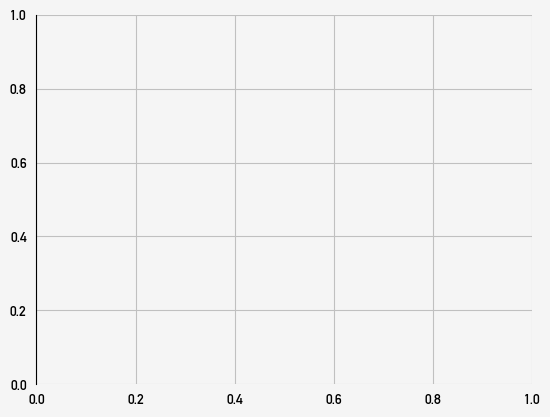

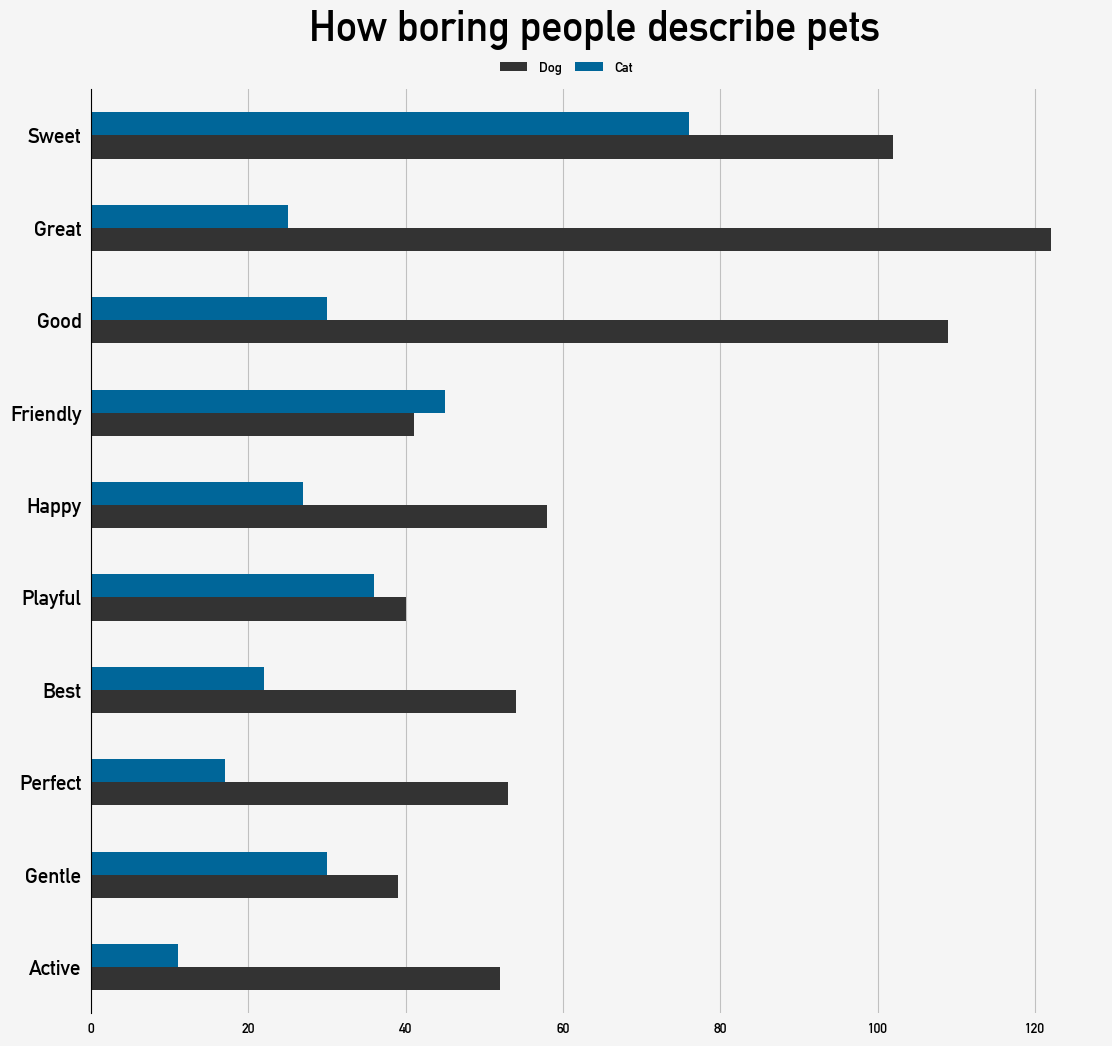

In [446]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = word_frequency_df.sort_values(by='sum', ascending=False).head(10).sort_values(by='sum').plot(kind='barh', y=['Dog', 'Cat'], color = ['#333333', '#006699', 'mediumaquamarine'], figsize=(13,12))

ax.grid(axis='y')
ax.set_ylabel('')
ax.set_yticklabels(labels=['Active', 'Gentle', 'Perfect', 'Best', 'Playful', 'Happy', 'Friendly', 'Good', 'Great', 'Sweet'], fontdict={'fontsize': 15})
ax.legend(ncol=2, loc=(.4,1.01), columnspacing=1.0)

ax.set_title('How boring people describe pets', fontdict={'fontsize': 30,
        'fontweight' : 1,
        'verticalalignment': 'baseline'}, pad=35)

plt.savefig("pet-descriptors.svg", facecolor=fig.get_facecolor(), transparent=True)

# Where da rabies at?

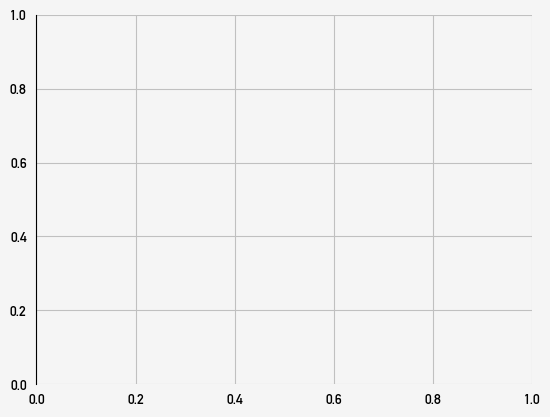

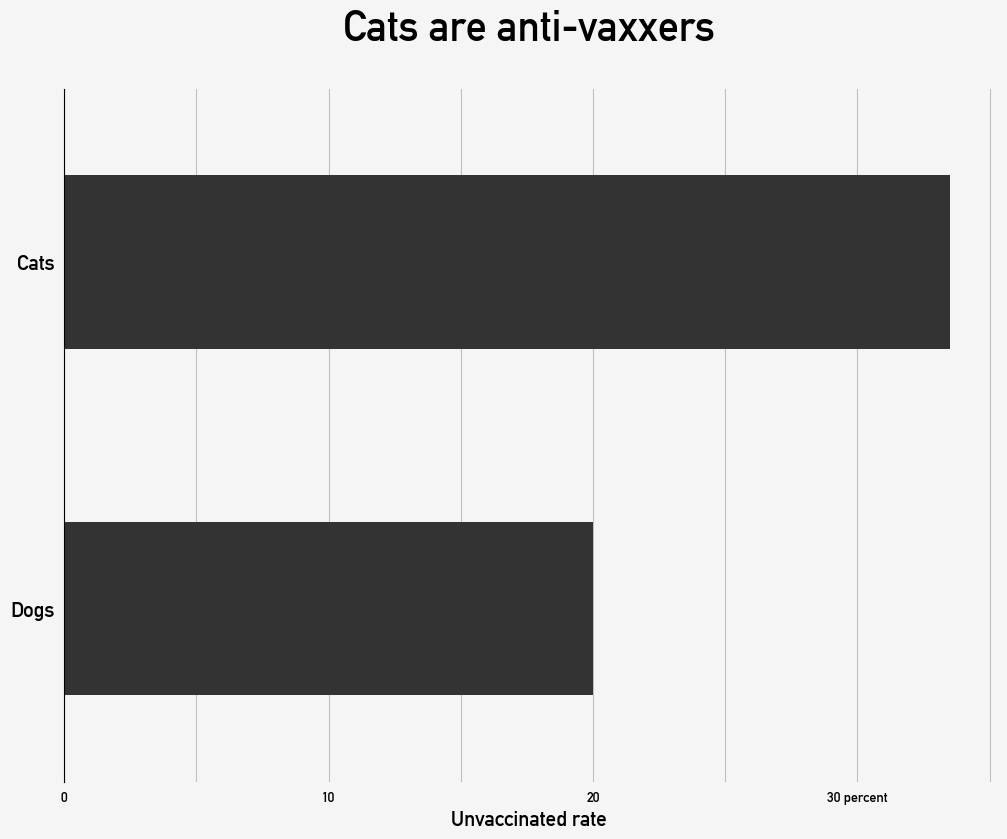

In [443]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = df.groupby('animal').vaccinated.value_counts(normalize=True).unstack().sort_values('Not vaccinated').plot(kind='barh', color = ['#333333', '#006699', '#333333', '#333333'], y=['Not vaccinated'], figsize=(12,9))

ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xlabel('Unvaccinated rate', fontdict={'fontsize': 15})

ax.set_title('Cats are anti-vaxxers', fontdict={'fontsize': 30,
        'fontweight' : 1,
        'verticalalignment': 'baseline'}, pad=35)

ax.legend(labels='')
ax.set_yticklabels(['Dogs', 'Cats'], fontdict={'fontsize': 15})

ax.set_xticklabels(['0', '', '10', '', '20', '', '30 percent', ''])

plt.savefig("anti-vaxxers.svg", facecolor=fig.get_facecolor(), transparent=True)


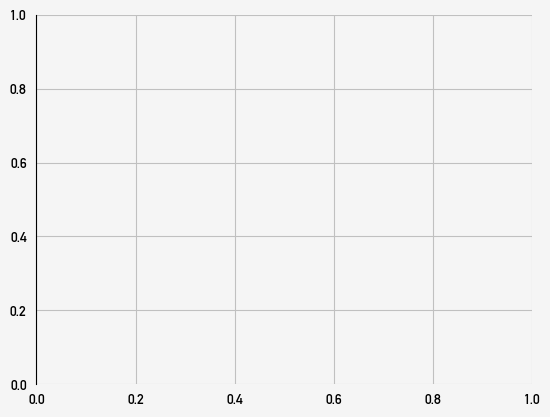

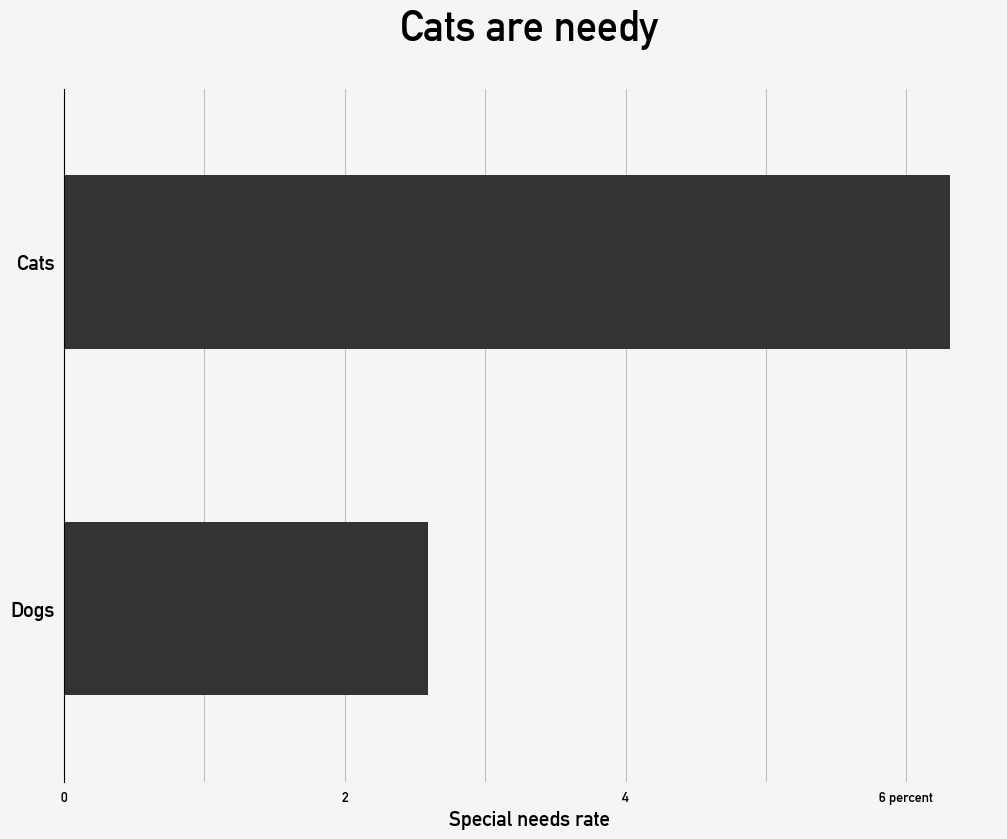

In [436]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = df.groupby('animal').specialNeeds.value_counts(normalize=True).unstack().sort_values('Has special needs').plot(kind='barh', color = ['#333333', '#006699', '#333333', '#333333'], y=['Has special needs'], figsize=(12,9))

ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xlabel('Special needs rate', fontdict={'fontsize': 15})

ax.set_title('Cats are needy', fontdict={'fontsize': 30,
        'fontweight' : 1,
        'verticalalignment': 'baseline'}, pad=35)

ax.legend(labels='')
ax.set_yticklabels(['Dogs', 'Cats'], fontdict={'fontsize': 15})

ax.set_xticklabels(['0', '', '2', '', '4', '', '6 percent'])

plt.savefig("special-needs.svg", facecolor=fig.get_facecolor())
